In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1523,2020-09-04,United Kingdom,340019.0,340411.0,41552.0,41527.0,-392.0,25.0
1524,2020-09-04,Germany,247274.0,246948.0,9336.0,9319.0,326.0,17.0
1525,2020-09-04,Iran,382896.0,380746.0,22039.0,21926.0,2150.0,113.0
1526,2020-09-04,Turkey,274587.0,274943.0,6500.0,6511.0,-356.0,-11.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8421.212696335078
RMSE =  32777.57235799962


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  301.4306282722513
RMSE =  743.9290564963009


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  59774.57931034483
RMSE =  103146.78960360828
-- World performances for deaths --
MAE =  1705.2275862068966
RMSE =  2083.7973427176744


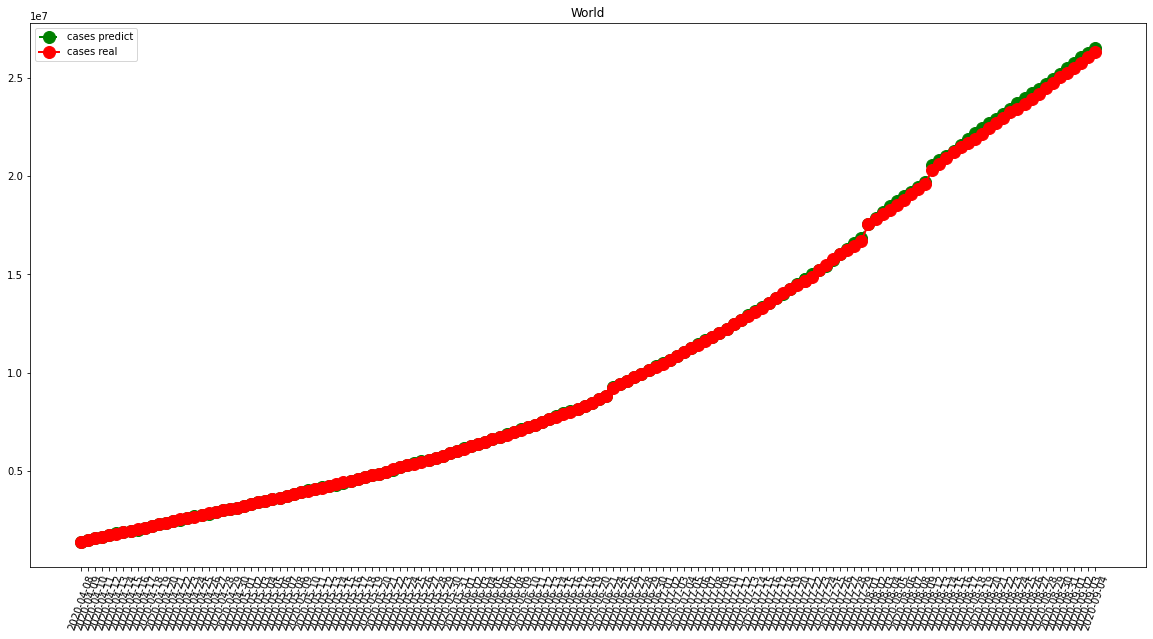

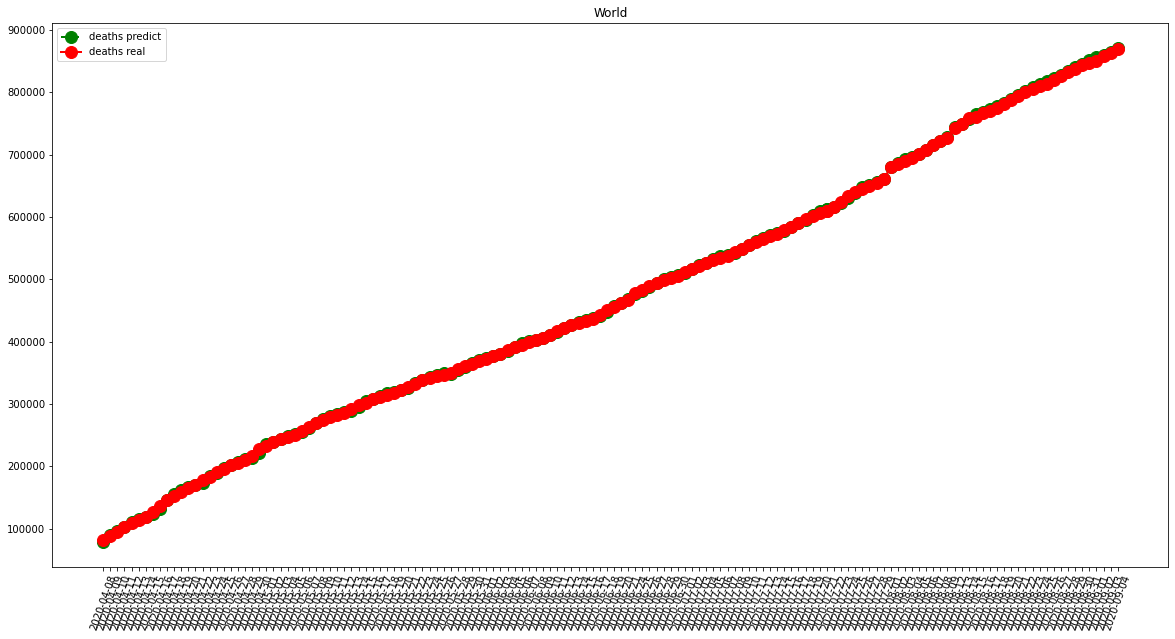

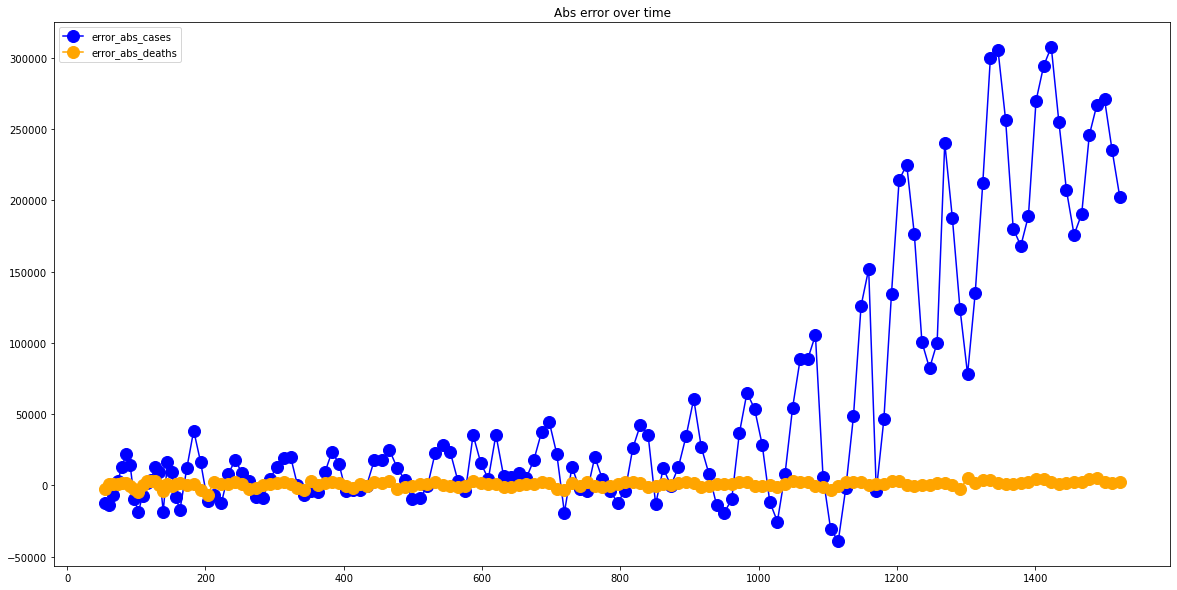

In [7]:
visShow("World")

-- France performances for cases --
MAE =  999.7741935483871
RMSE =  1503.5796877516518
-- France performances for deaths --
MAE =  120.67096774193548
RMSE =  269.4195193733276


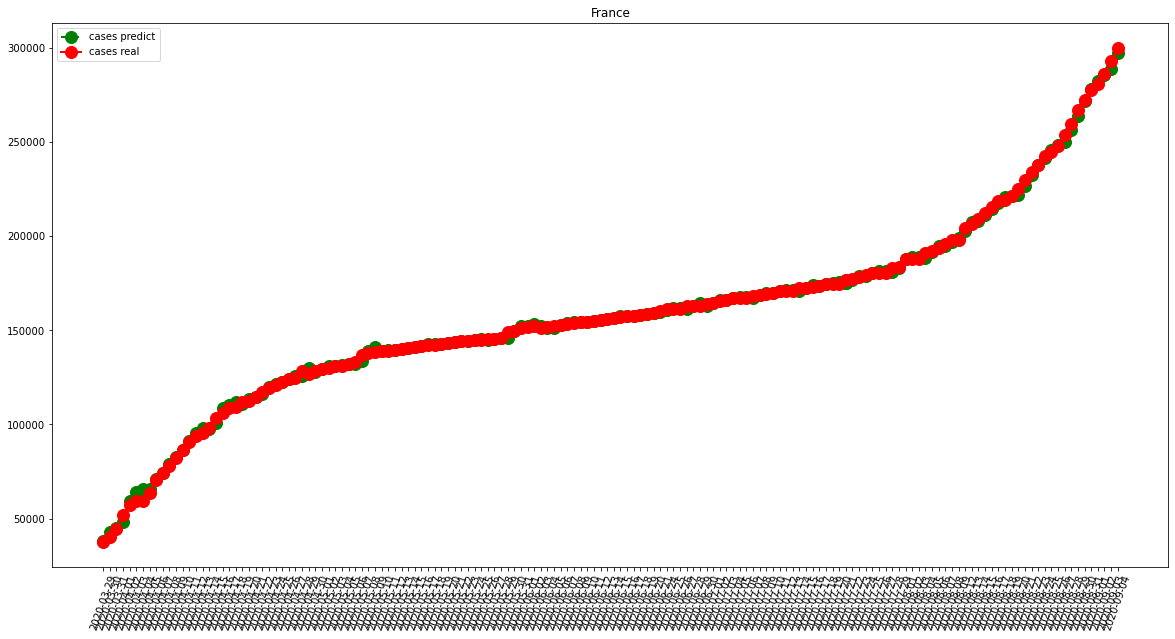

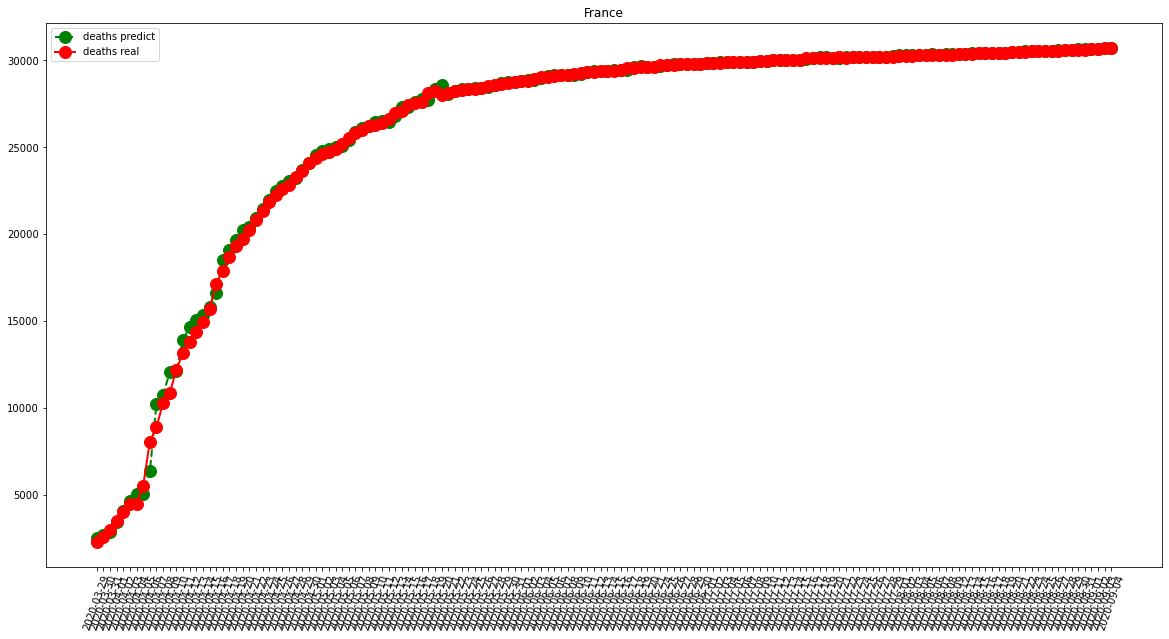

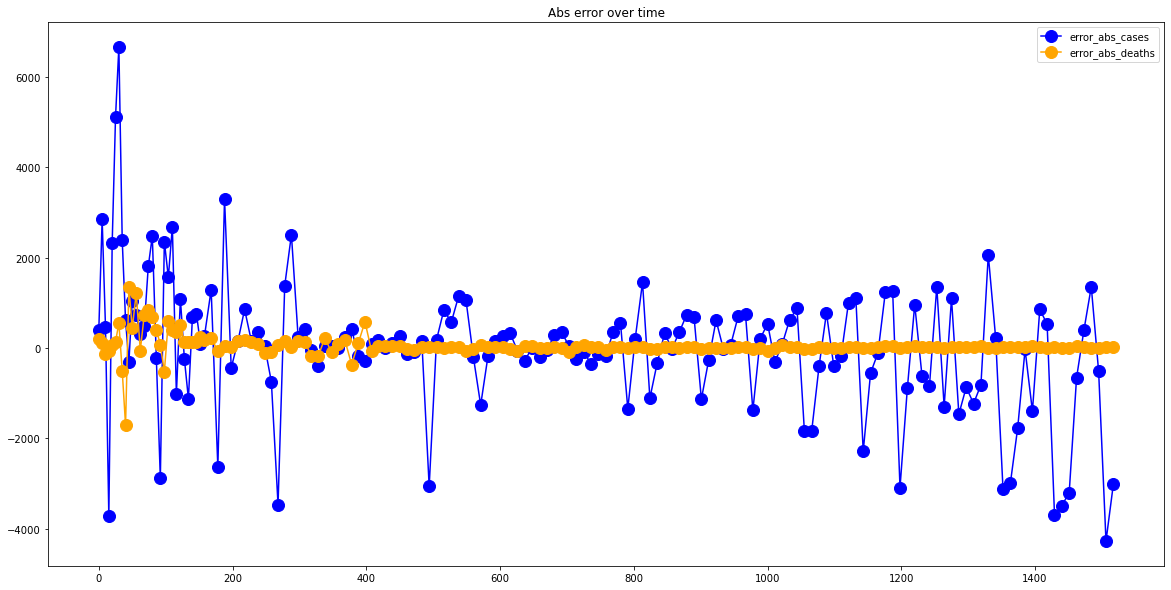

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.65806451612906
RMSE =  454.4664294355205
-- Italy performances for deaths --
MAE =  72.18064516129033
RMSE =  238.44585508339543


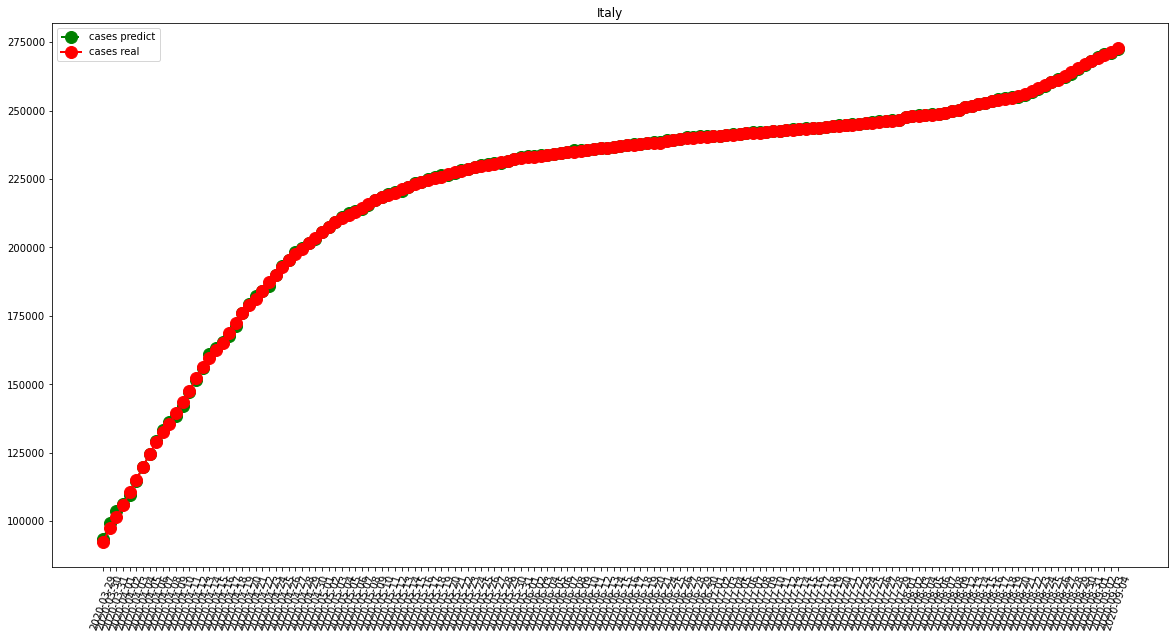

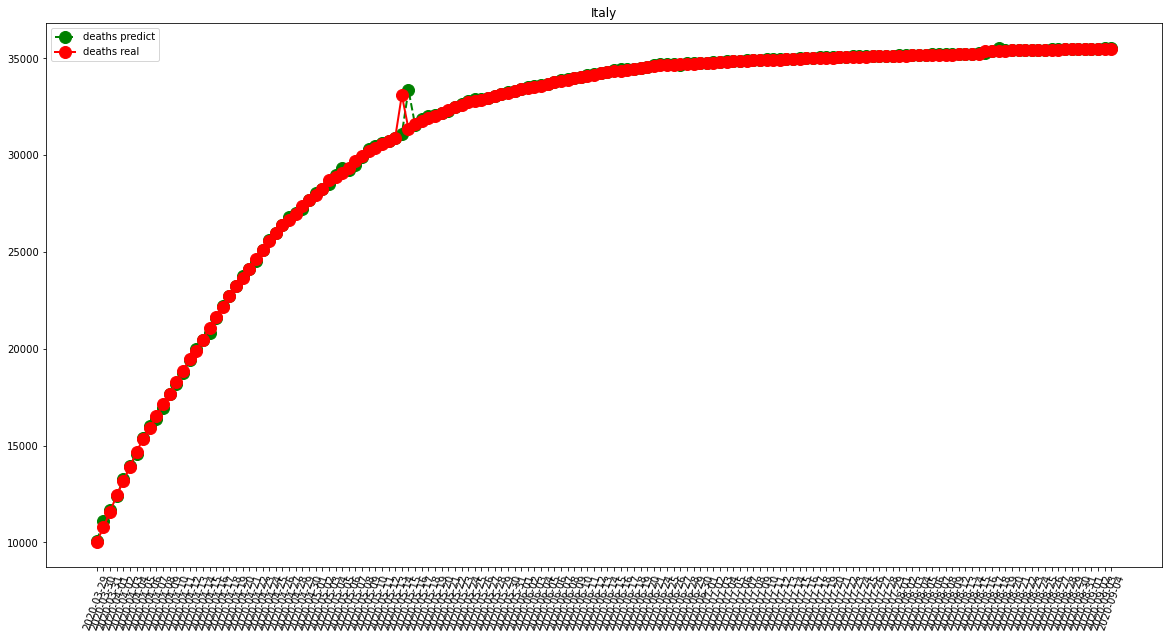

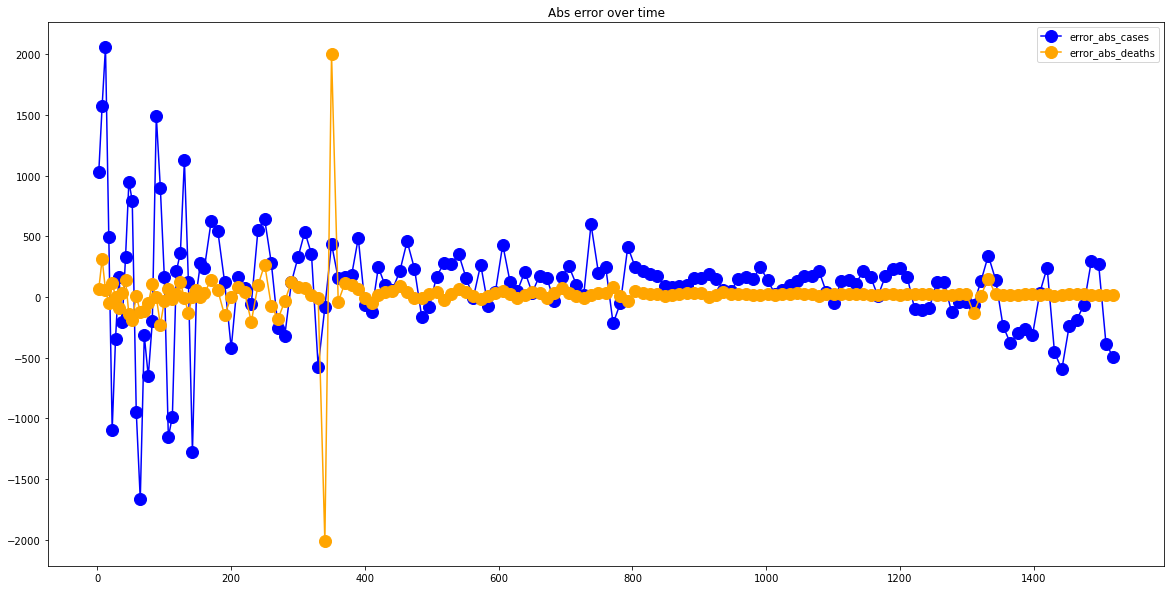

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1985.225806451613
RMSE =  3871.6702488885894
-- Spain performances for deaths --
MAE =  124.47741935483872
RMSE =  326.4323078570858


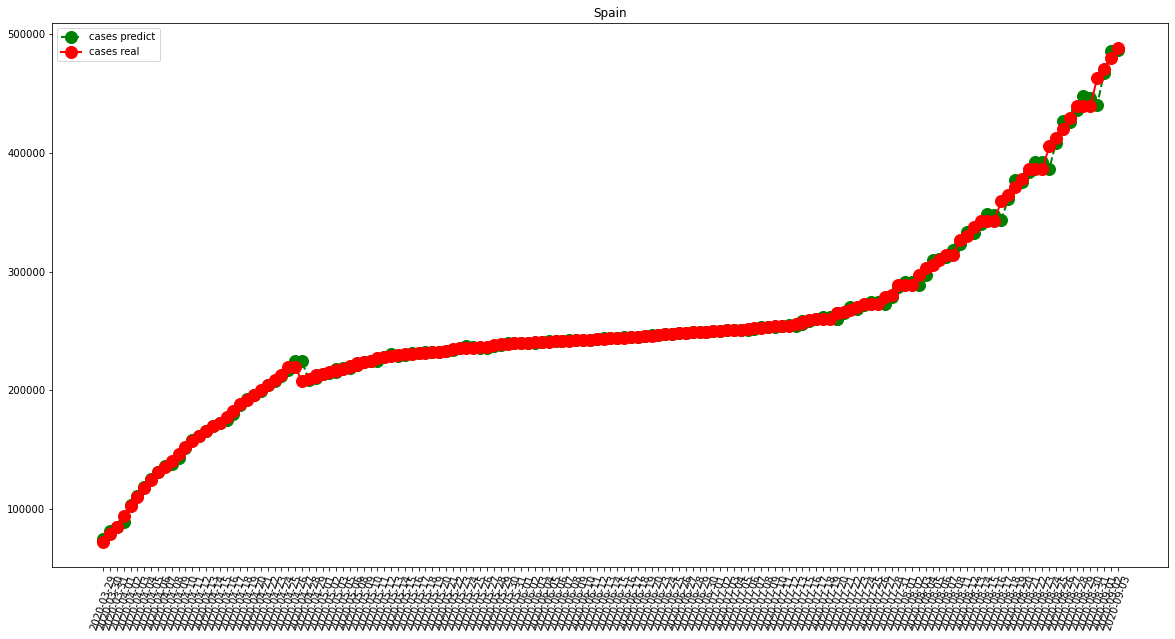

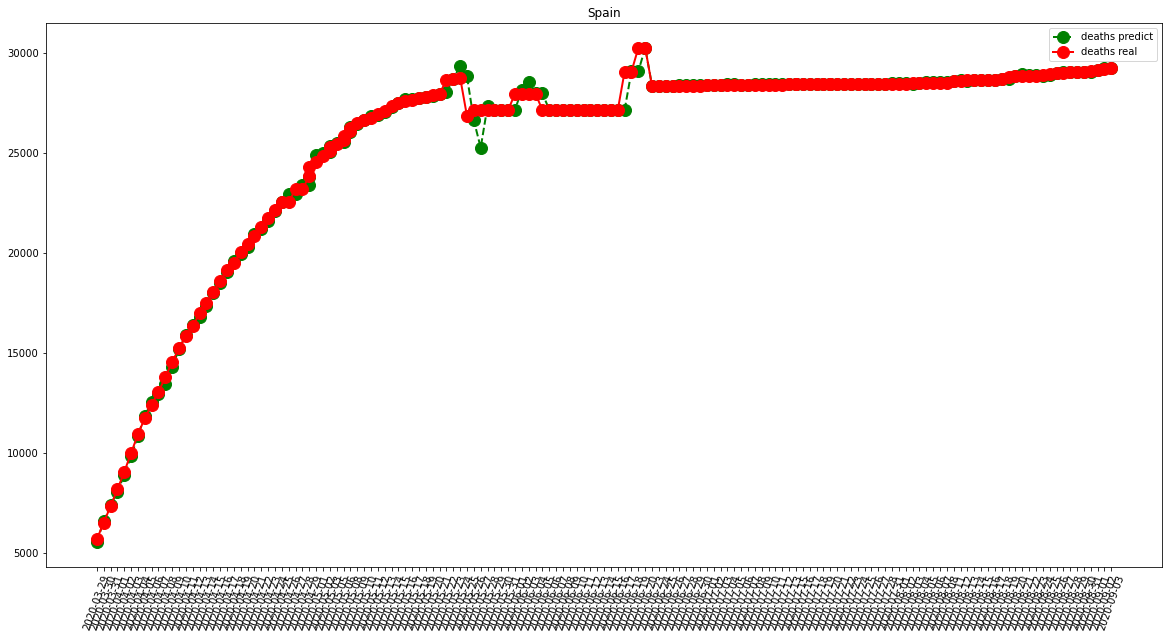

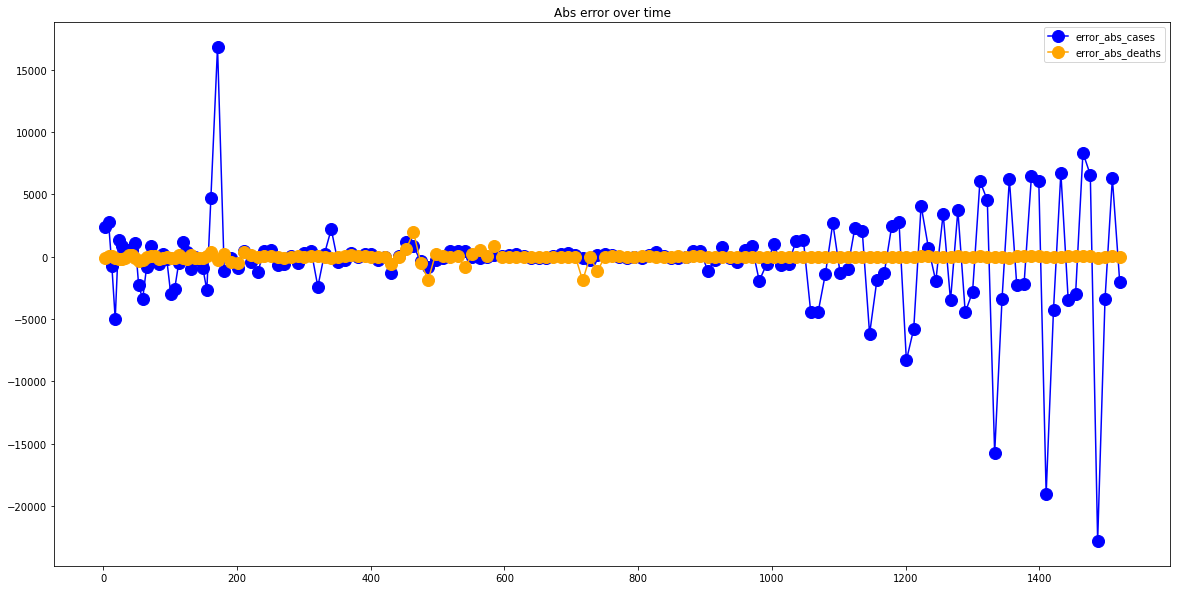

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12701.838709677419
RMSE =  19707.336265724058
-- United States performances for deaths --
MAE =  485.47741935483873
RMSE =  687.095546720091


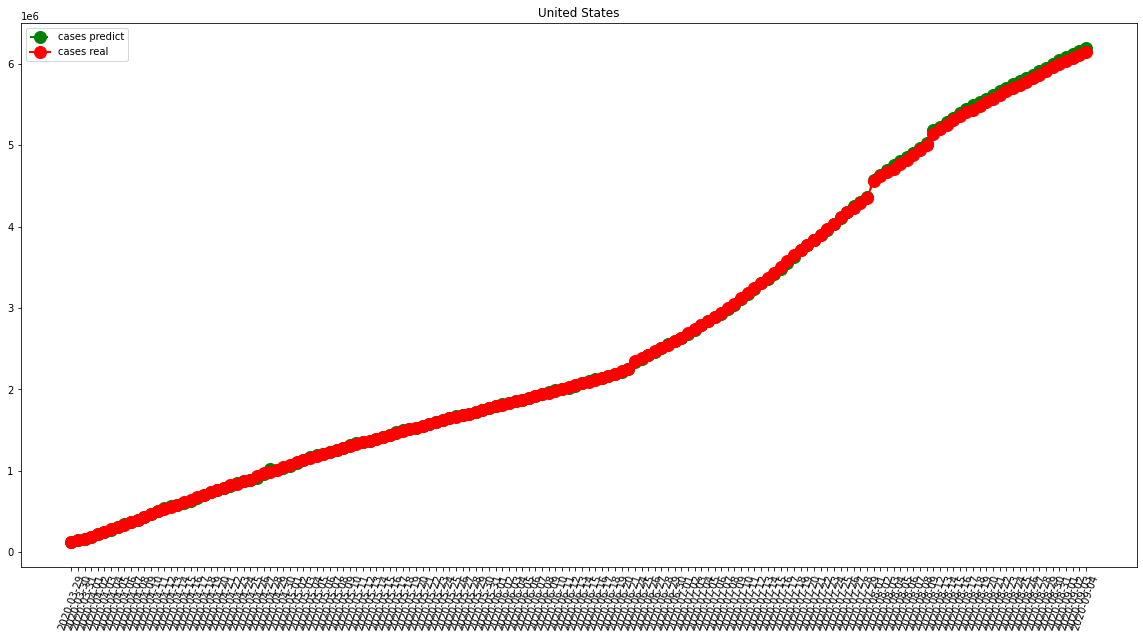

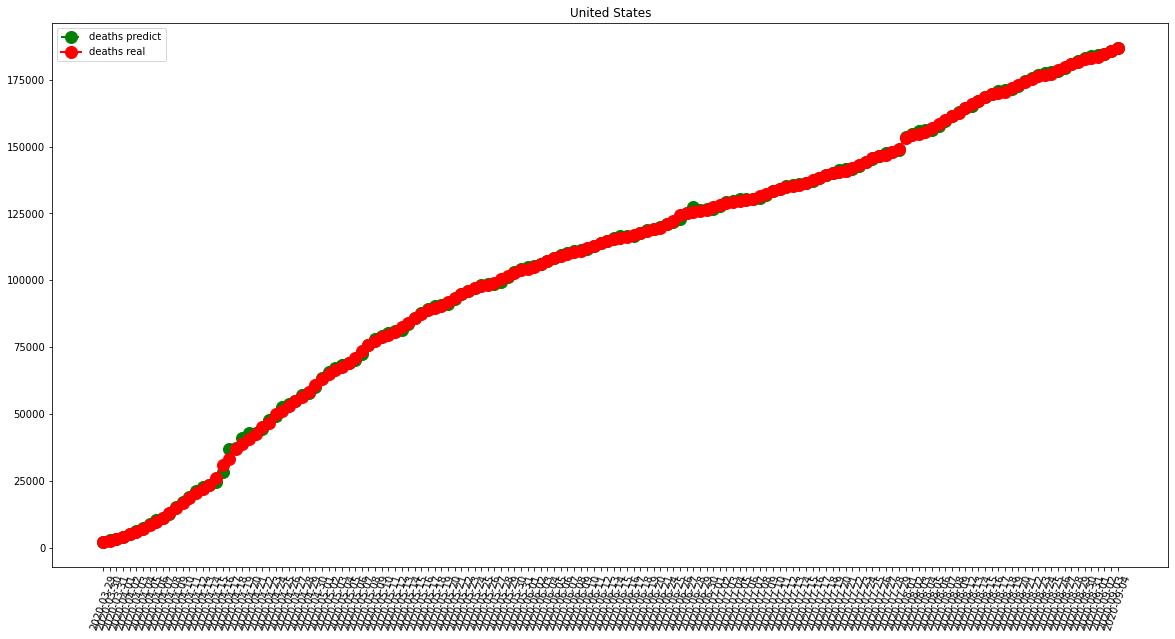

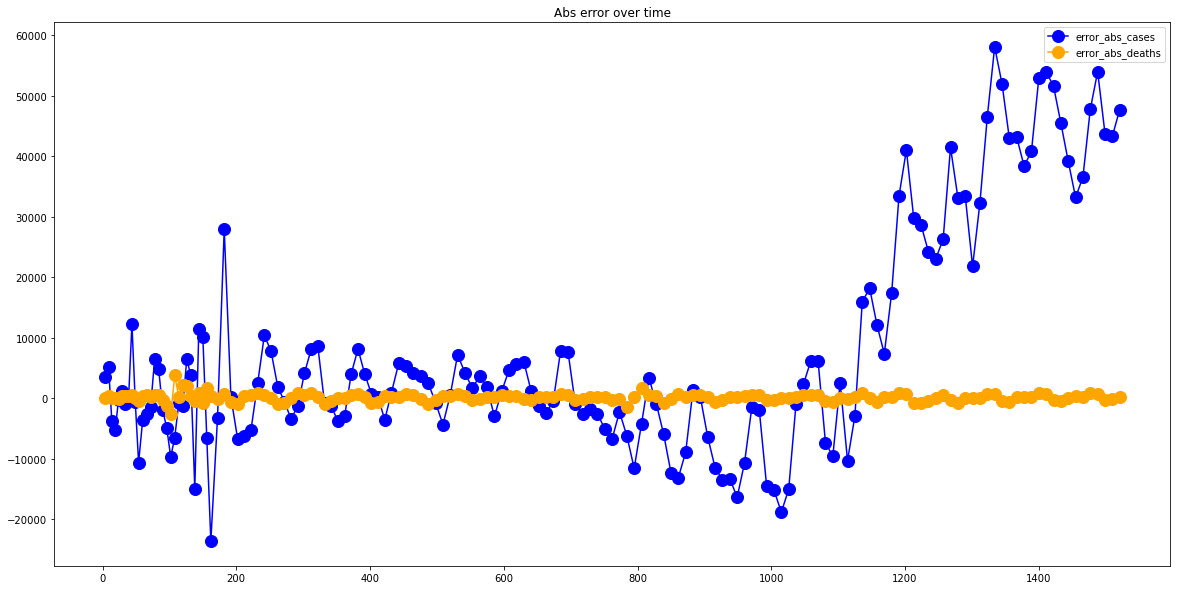

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  64.65806451612903
RMSE =  95.84335337986028
-- China performances for deaths --
MAE =  26.948387096774194
RMSE =  126.12362087228341


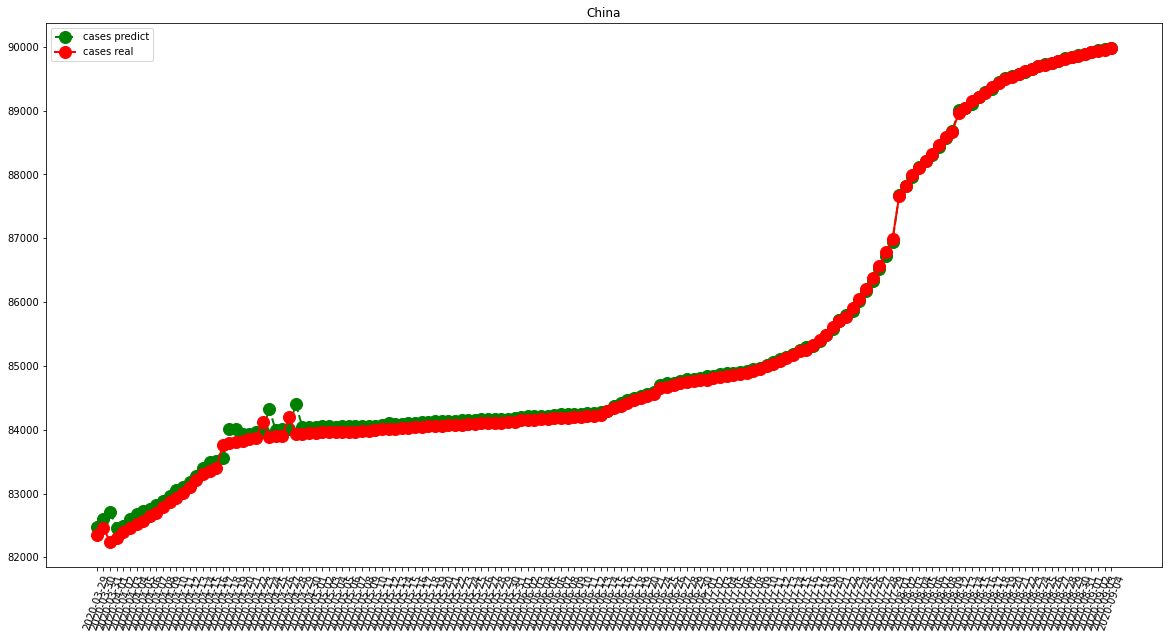

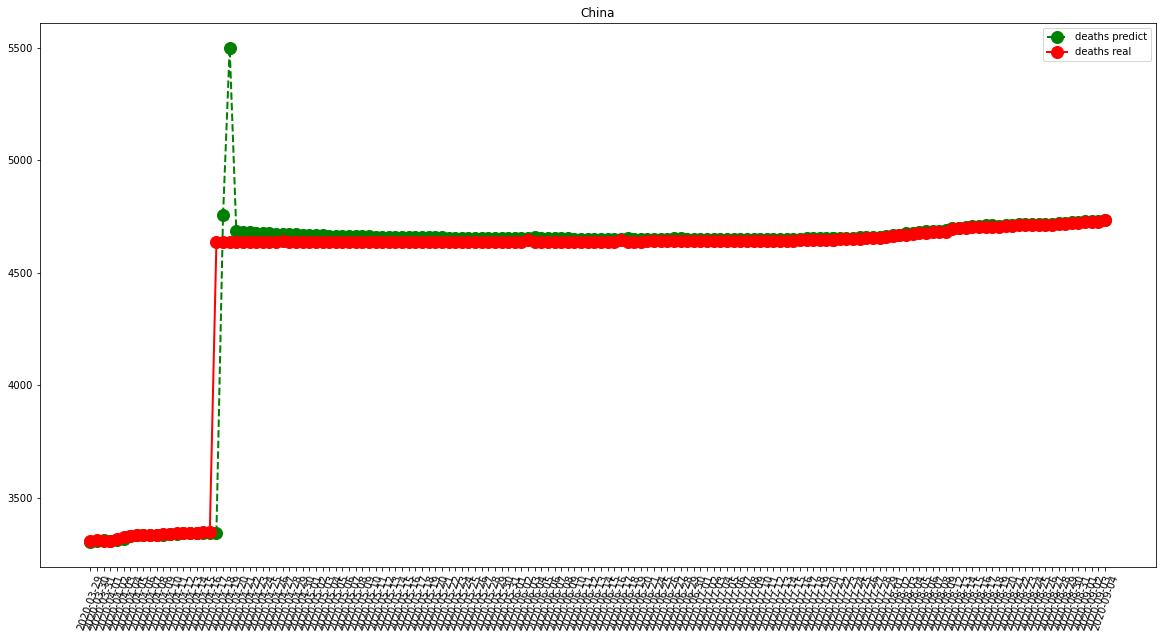

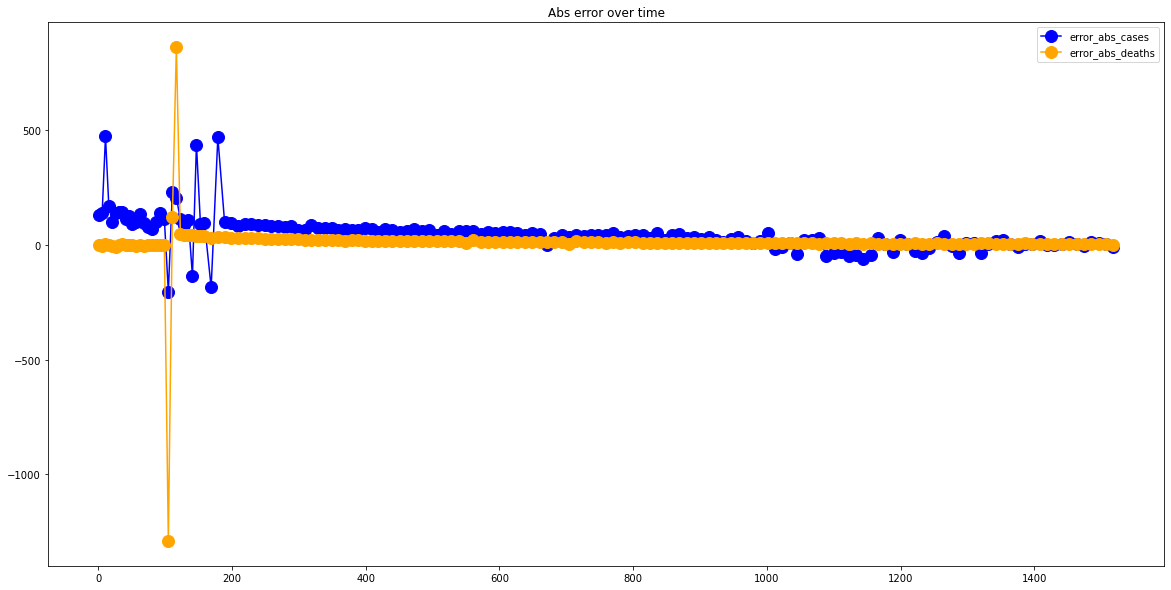

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1041.267716535433
RMSE =  3710.6619960350604
-- United Kingdom performances for deaths --
MAE =  238.79527559055117
RMSE =  757.2939235291494


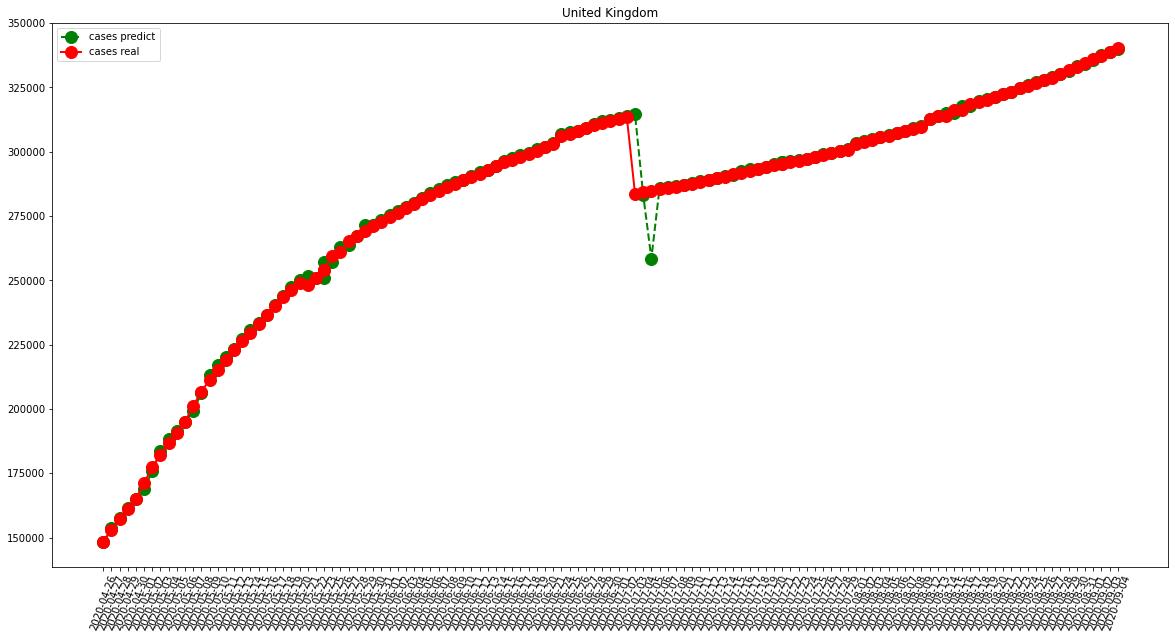

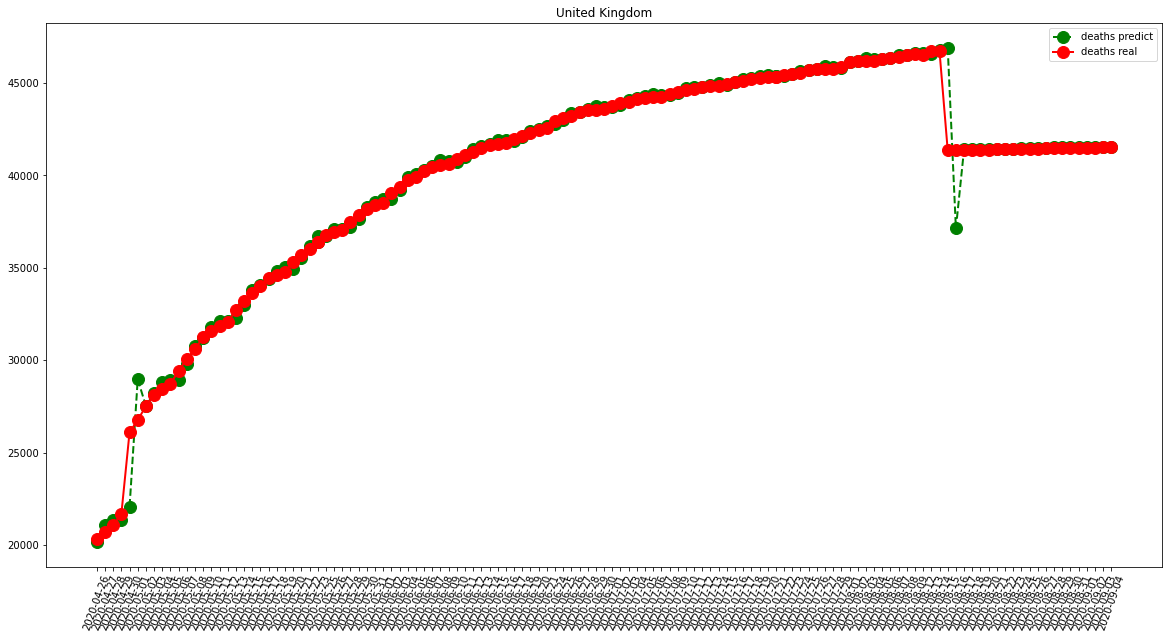

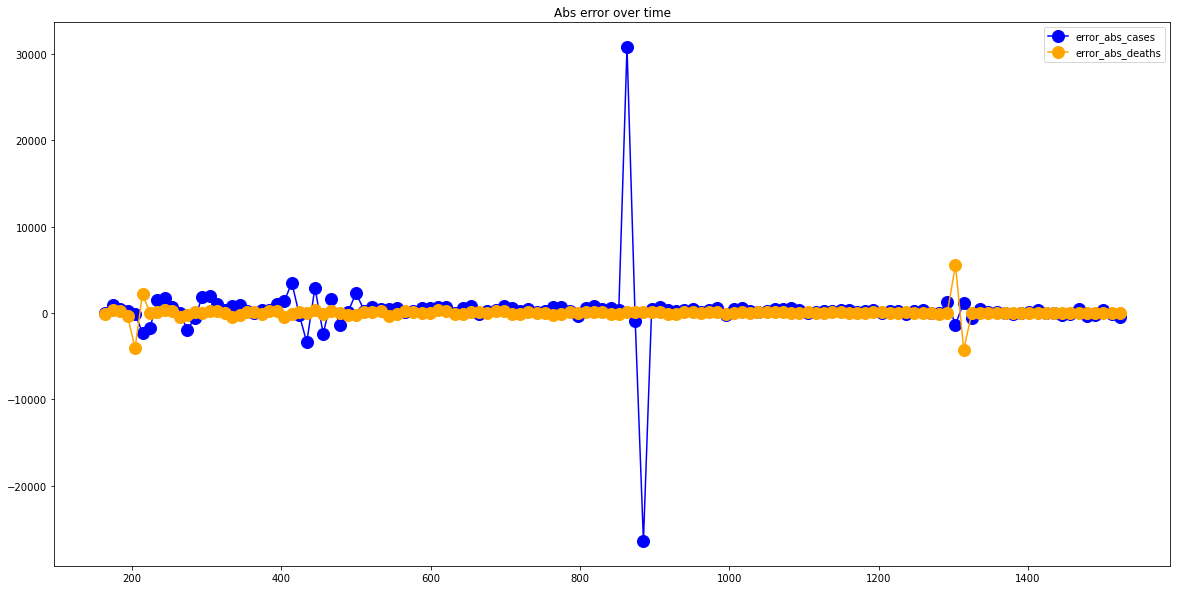

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  398.8582677165354
RMSE =  580.6612914884811
-- Germany performances for deaths --
MAE =  20.700787401574804
RMSE =  39.026237893172436


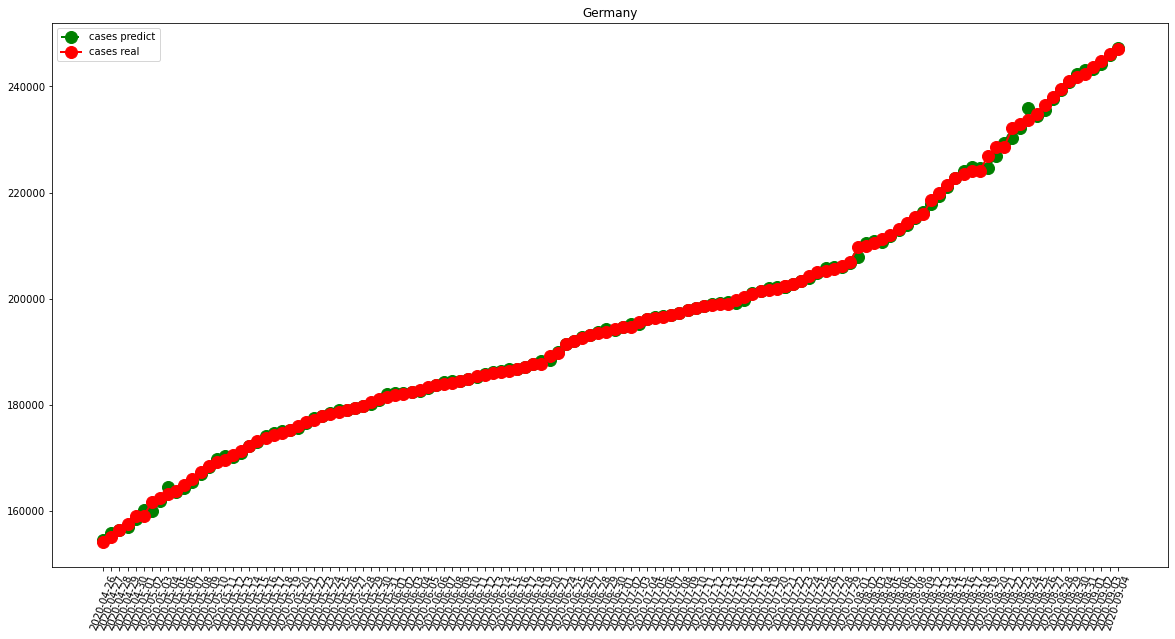

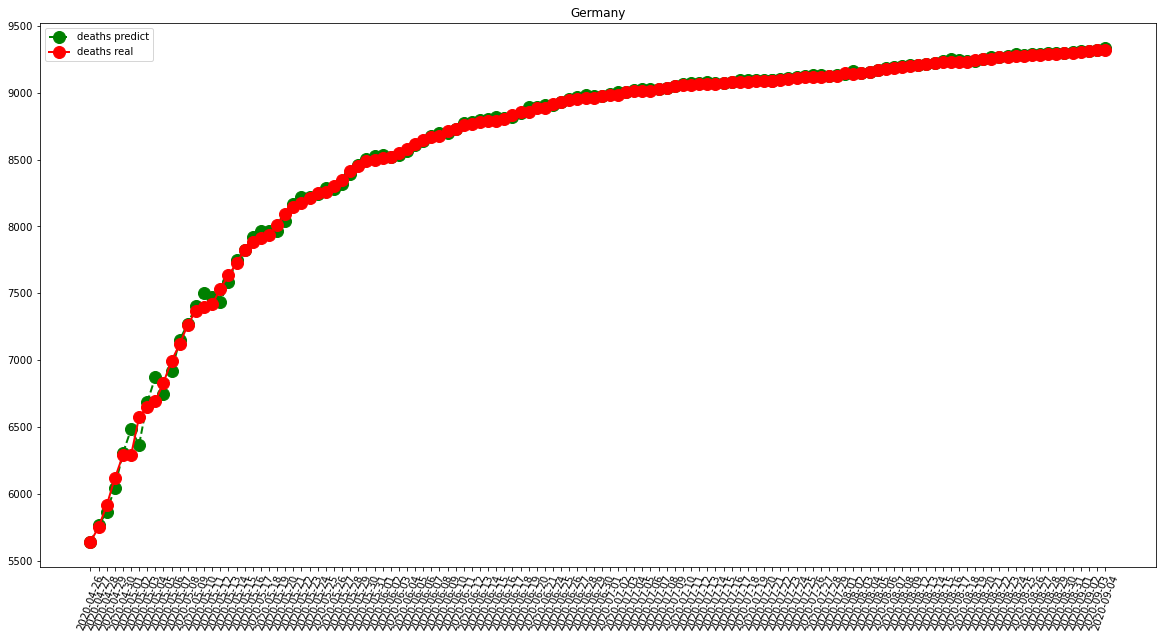

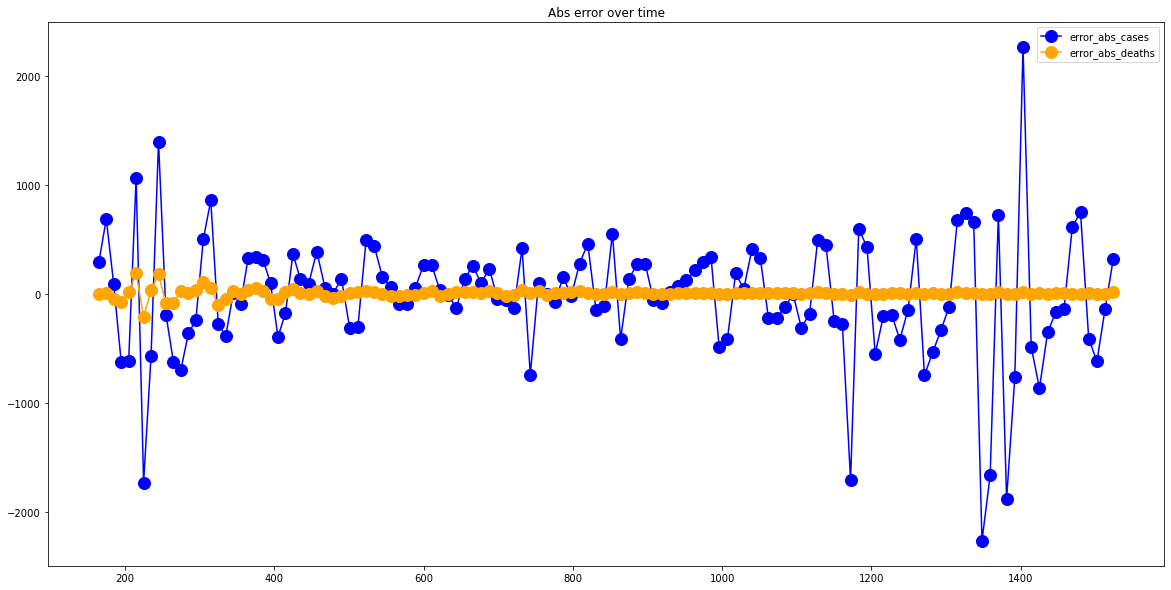

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  828.2598425196851
RMSE =  1207.7433599991543
-- Iran performances for deaths --
MAE =  46.69291338582677
RMSE =  83.78591015294565


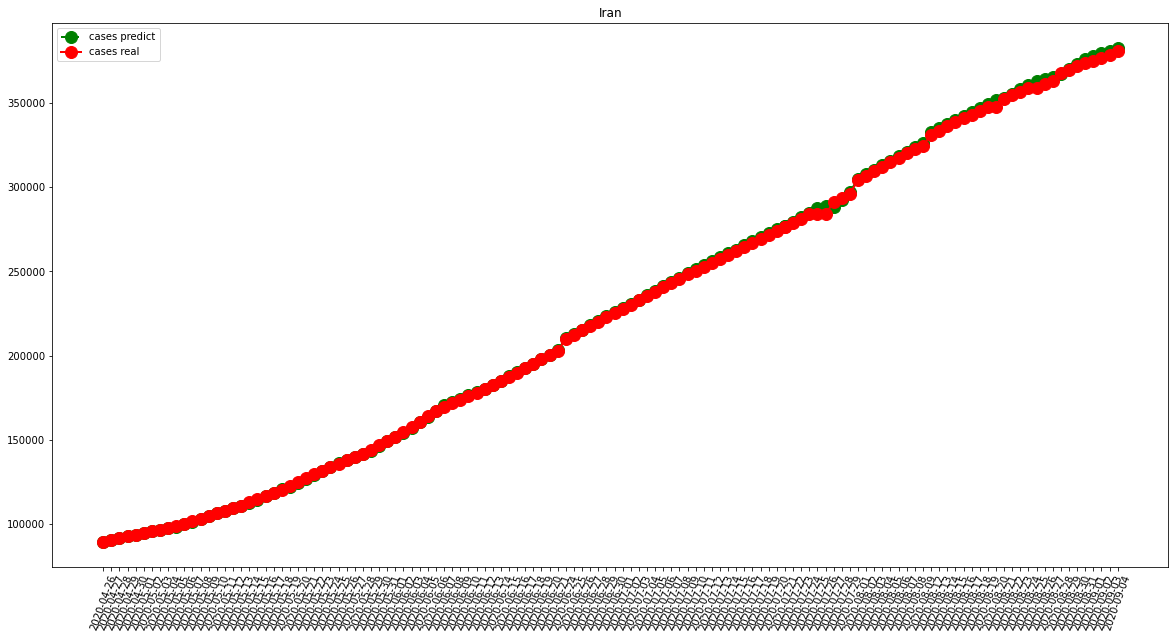

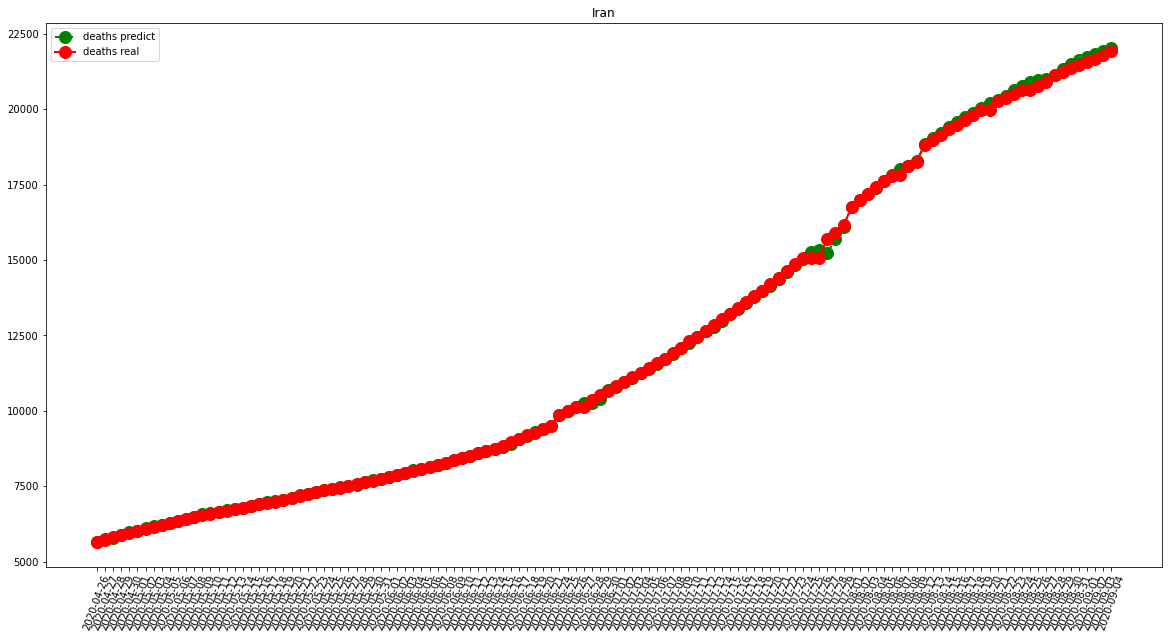

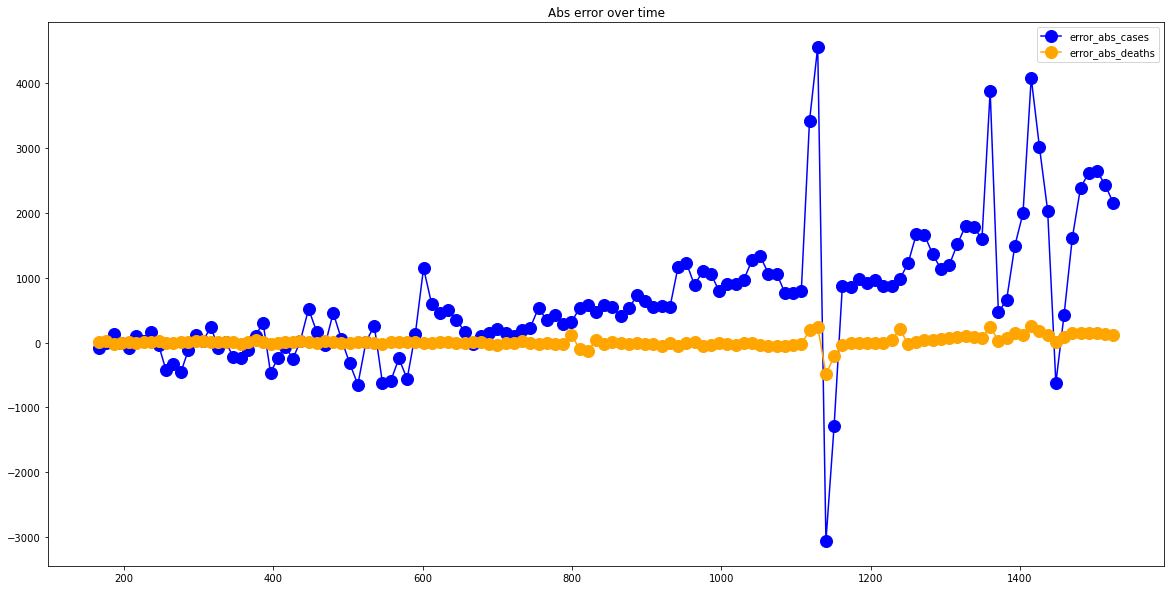

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  205.15748031496062
RMSE =  326.274593304812
-- Turkey performances for deaths --
MAE =  16.212598425196852
RMSE =  90.15083598251576


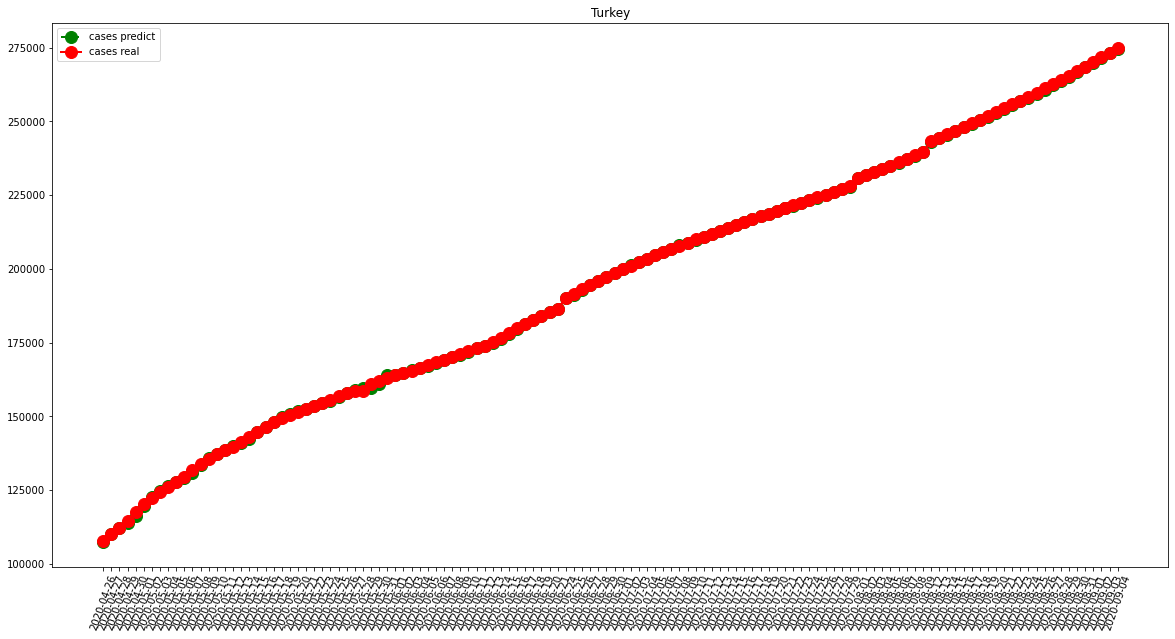

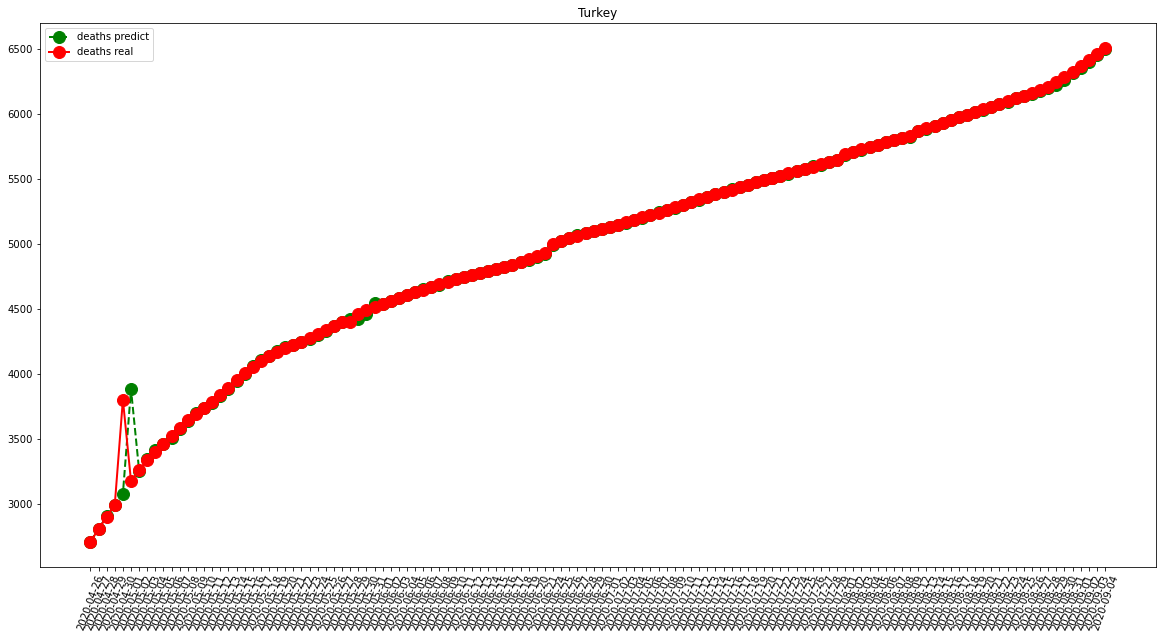

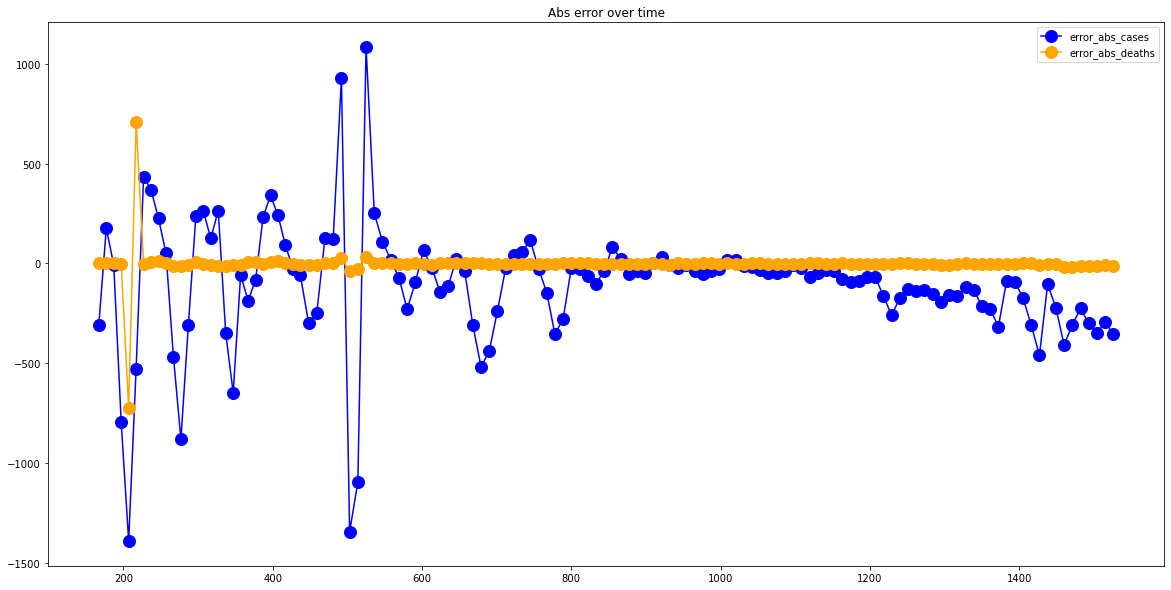

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13976.1
RMSE =  18451.881366950092
-- Brazil performances for deaths --
MAE =  437.71
RMSE =  537.1110034248042


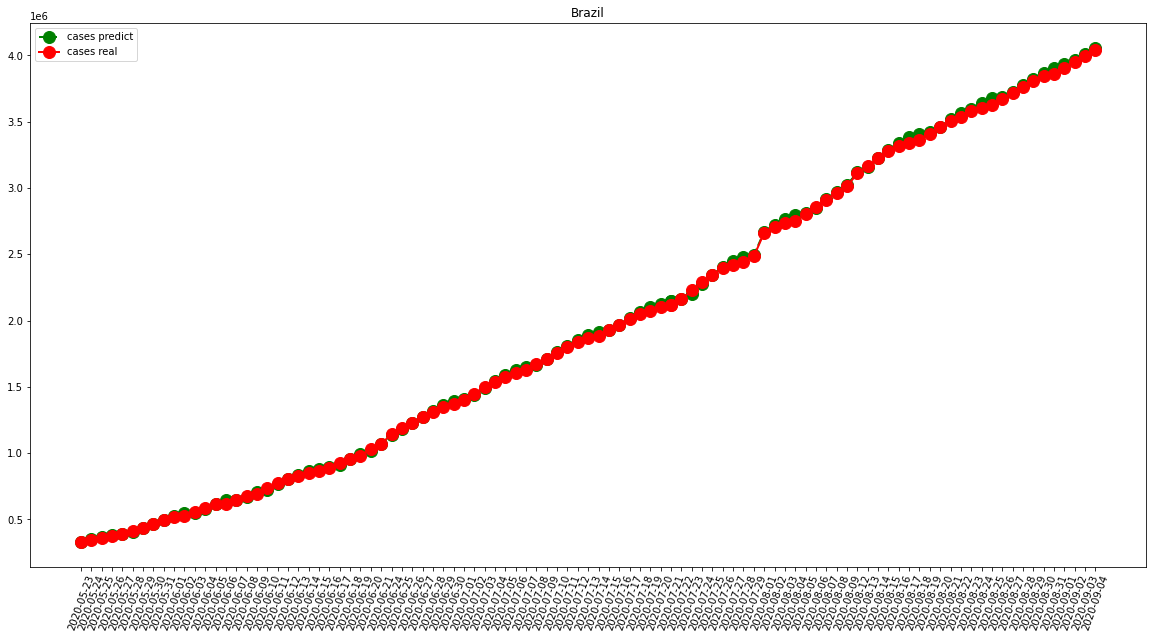

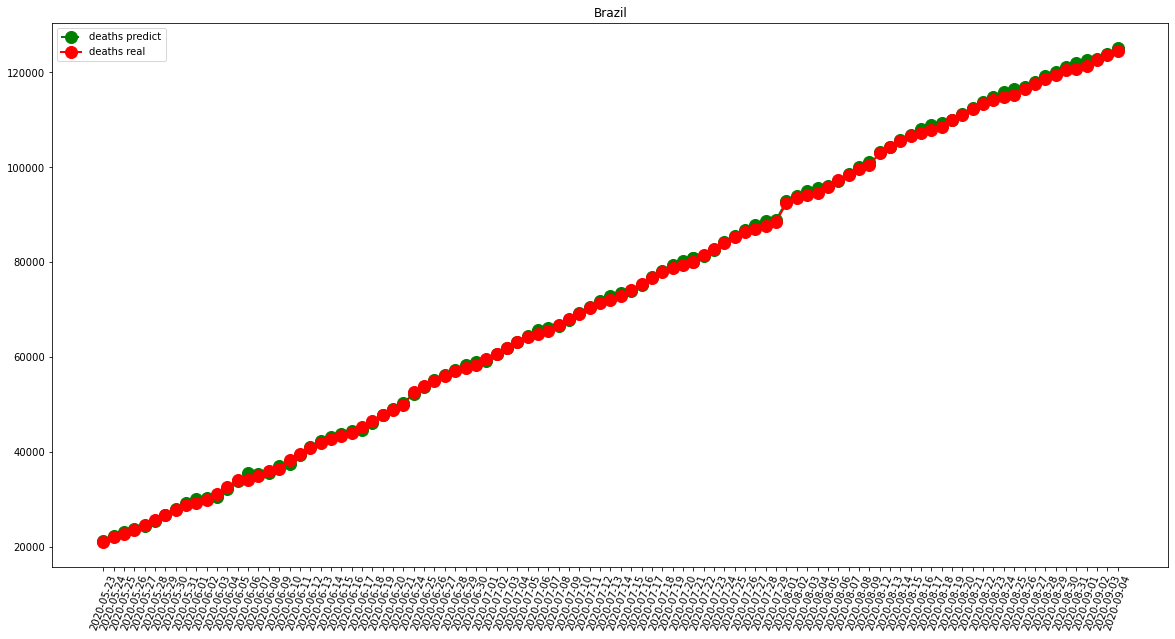

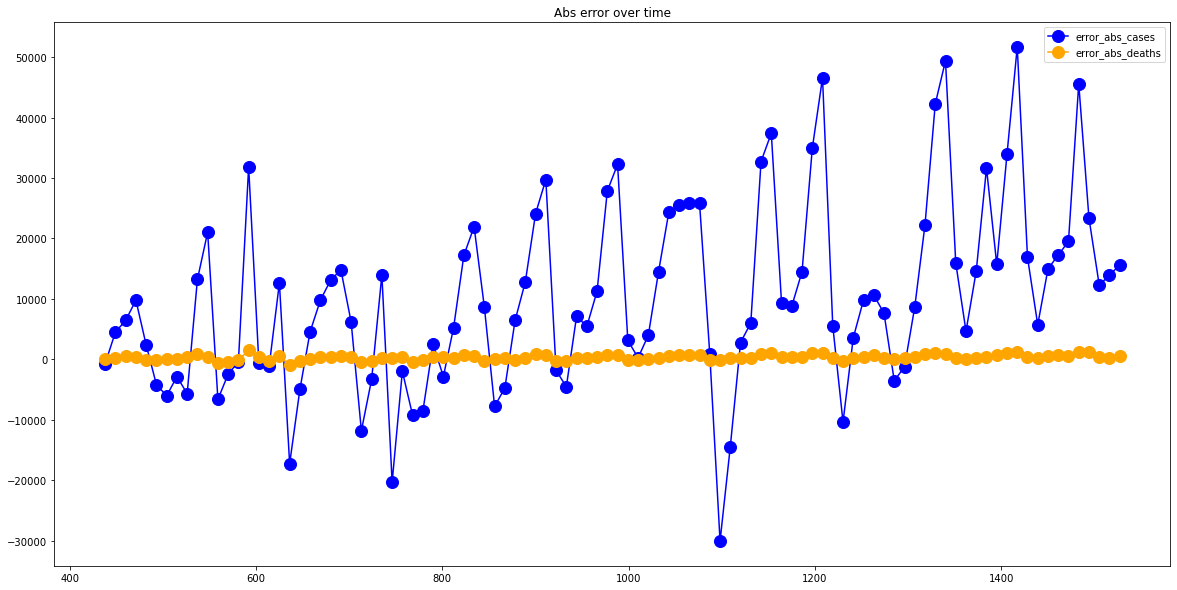

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)